In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


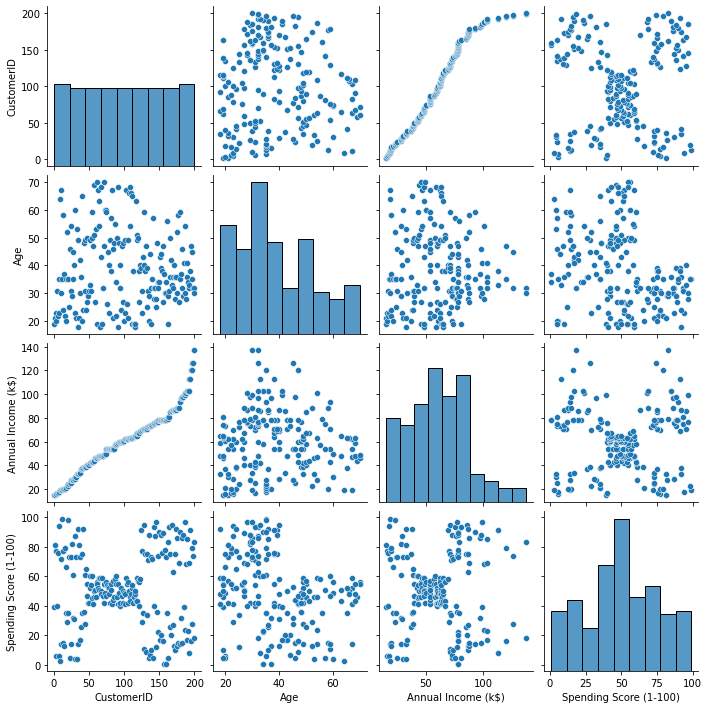

In [3]:
sns.pairplot(df)

In [4]:
x=df.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

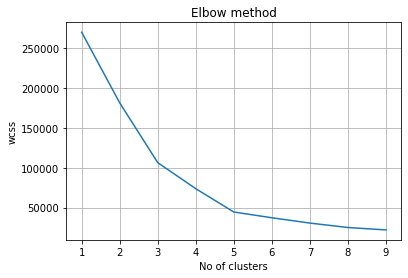

In [7]:
plt.plot(range(1,10),wcss)
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.grid(True)
plt.show()

In [8]:
kmeans=KMeans(n_clusters=5,random_state=1)
ykmeans=kmeans.fit_predict(x)

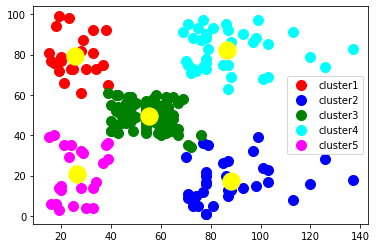

In [9]:
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1],s=100,c="blue",label="cluster2")
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1],s=100,c="green",label="cluster3")
plt.scatter(x[ykmeans==3,0],x[ykmeans==3,1],s=100,c="cyan",label="cluster4")
plt.scatter(x[ykmeans==4,0],x[ykmeans==4,1],s=100,c="magenta",label="cluster5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow")
plt.legend()

In [10]:
df["Target"]=ykmeans

In [11]:
import scipy.cluster.hierarchy as sch

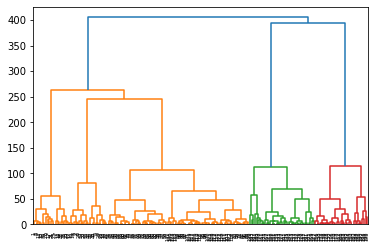

In [12]:
lk=sch.linkage(x,method="ward")
ddg=sch.dendrogram(lk)

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters=5)
yhc = hc.fit_predict(x)

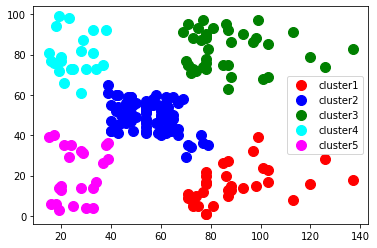

In [15]:
plt.scatter(x[yhc==0,0],x[yhc==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[yhc==1,0],x[yhc==1,1],s=100,c="blue",label="cluster2")
plt.scatter(x[yhc==2,0],x[yhc==2,1],s=100,c="green",label="cluster3")
plt.scatter(x[yhc==3,0],x[yhc==3,1],s=100,c="cyan",label="cluster4")
plt.scatter(x[yhc==4,0],x[yhc==4,1],s=100,c="magenta",label="cluster5")

plt.legend()
plt.show()

In [16]:
df["HC"]=yhc

In [17]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target,HC
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,2
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,3,2
198,199,Male,32,137,18,1,0
